In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix
from sklearn.metrics import classification_report

In [35]:
data = pd.read_csv(r"C:\Users\user\Downloads\Company_Data (2).csv")

In [36]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [38]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [39]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
data = pd.get_dummies(data , columns = ['Urban','US','ShelveLoc'])

In [41]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [42]:
x = data.drop(['Sales'] , axis = 1)
y = data['Sales']

In [74]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0


In [43]:
y = pd.cut(y , bins = [-float('inf'),4 ,float('inf')] , labels = ['Low','High'])

In [44]:
y

0      High
1      High
2      High
3      High
4      High
       ... 
395    High
396    High
397    High
398    High
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [45]:
y.value_counts()

High    364
Low      36
Name: Sales, dtype: int64

In [46]:
## spliting the data into the trainig and testing data sets



In [47]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [54]:
## Descision Tree calssifier

clf = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 3)
clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
y_pred = clf.predict(x_test)

In [56]:
y_pred

array(['Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High'],
      dtype=object)

In [57]:
## acuracy_score


accuracy_value = accuracy_score(y_test , y_pred)

In [58]:
accuracy_value

0.9

In [61]:
classification = classification_report(y_test , y_pred)

In [62]:
print(classification)

              precision    recall  f1-score   support

        High       0.93      0.96      0.95        73
         Low       0.40      0.29      0.33         7

    accuracy                           0.90        80
   macro avg       0.67      0.62      0.64        80
weighted avg       0.89      0.90      0.89        80



In [69]:
precision_value =  precision_score(y_test , y_pred , pos_label = 'High')

In [70]:
precision_value

0.9333333333333333

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.4230769230769231, 0.875, 'High <= 0.5\nentropy = 0.439\nsamples = 320\nvalue = [291, 29]'),
 Text(0.15384615384615385, 0.625, 'High <= 127.5\nentropy = 0.266\nsamples = 243\nvalue = [232, 11]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.23076923076923078, 0.375, 'High <= 61.5\nentropy = 0.573\nsamples = 81\nvalue = [70, 11]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.235\nsamples = 52\nvalue = [50, 2]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.894\nsamples = 29\nvalue = [20, 9]'),
 Text(0.6923076923076923, 0.625, 'High <= 52.0\nentropy = 0.785\nsamples = 77\nvalue = [59, 18]'),
 Text(0.5384615384615384, 0.375, 'High <= 154.0\nentropy = 0.485\nsamples = 38\nvalue = [34, 4]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.8461538461538461, 0.375, 'High <= 86.5\nentropy = 0.942\nsamples = 39\

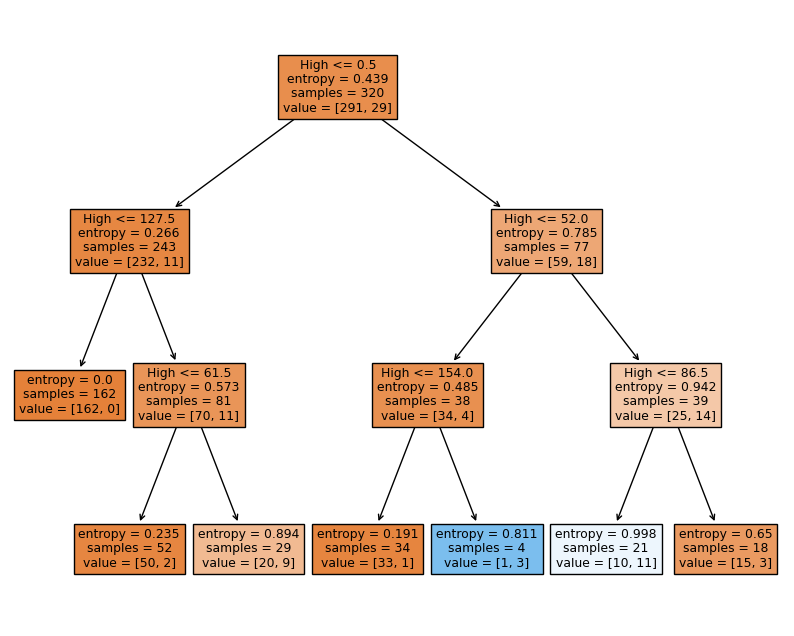

In [77]:
plt.figure(figsize = (10,8))
plot_tree(clf , filled = True , feature_names = y)

In [78]:
## Building a decision tree classifier using a Ginni function

clf = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
y_pred = clf.predict(x_test)

In [80]:
y_pred

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Low',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High'],
      dtype=object)

In [82]:
accuracy = accuracy_score(y_test , y_pred)

In [83]:
accuracy

0.9125

In [85]:
precision_value = precision_score(y_test , y_pred , pos_label = 'High')

In [86]:
precision_value

0.9230769230769231

In [87]:
classification_value = classification_report(y_test , y_pred)

In [88]:
print(classification_value)

              precision    recall  f1-score   support

        High       0.92      0.99      0.95        73
         Low       0.50      0.14      0.22         7

    accuracy                           0.91        80
   macro avg       0.71      0.56      0.59        80
weighted avg       0.89      0.91      0.89        80



[Text(0.5, 0.875, 'High <= 0.5\ngini = 0.165\nsamples = 320\nvalue = [291, 29]'),
 Text(0.25, 0.625, 'High <= 135.5\ngini = 0.086\nsamples = 243\nvalue = [232, 11]'),
 Text(0.125, 0.375, 'High <= 127.5\ngini = 0.03\nsamples = 199\nvalue = [196, 3]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.149\nsamples = 37\nvalue = [34, 3]'),
 Text(0.375, 0.375, 'High <= 61.5\ngini = 0.298\nsamples = 44\nvalue = [36, 8]'),
 Text(0.3125, 0.125, 'gini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.4375, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.75, 0.625, 'High <= 129.5\ngini = 0.358\nsamples = 77\nvalue = [59, 18]'),
 Text(0.625, 0.375, 'High <= 54.5\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.6875, 0.125, 'gini = 0.412\nsamples = 31\nvalue = [22, 9]'),
 Text(0.875, 0.375, 'High <= 200.0\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0

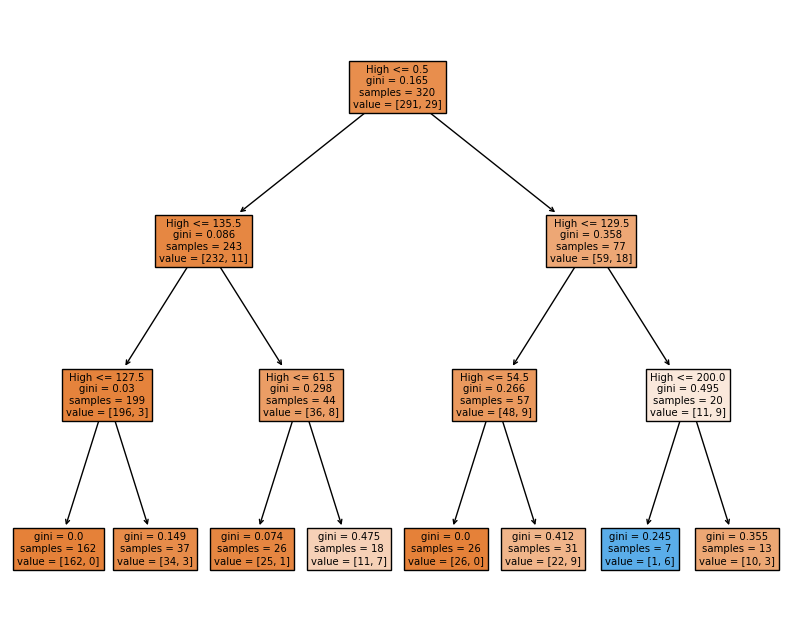

In [89]:
plt.figure(figsize = (10 , 8))
plot_tree(clf , filled = True , feature_names = y)